## Importing the Necessary Libraries Needed Throught out

In [13]:
import pandas as pd
import matplotlib.pyplot as plt  
import numpy as np  
from sklearn.cluster import KMeans
import sklearn
print(sklearn.__version__)

0.20.3


### Importing the DataSet

In [14]:
fpath="data/LS_Group2/Class1.txt"
X1 = pd.read_csv(fpath,header = None, delimiter=' ', usecols=(0, 1))

fpath="data/LS_Group2/Class2.txt"
X2 = pd.read_csv(fpath, header = None, delimiter=' ', usecols=(0, 1))

fpath="data/LS_Group2/Class3.txt"
X3= pd.read_csv(fpath, header = None, delimiter=' ', usecols=(0, 1))

X=np.concatenate((X1,X2))
X=np.concatenate((X,X3))

### Fitting the Model and Visualising The Results at each Iteration of Training

Iteration 1
[[ 11.764      -17.364     ]
 [  0.65797577  -8.67354742]
 [  9.954      -16.96      ]]
Iteration 2
[[ 11.764      -17.364     ]
 [ -0.6614159   -7.63856564]
 [  6.99096576 -13.64147315]]
Iteration 3
[[  9.76896667 -17.11016667]
 [ -1.73567278  -6.74519983]
 [  5.74085584 -12.75439639]]
Iteration 4
[[  8.27966977 -15.82413953]
 [ -1.72717128  -5.69314639]
 [  4.06919411 -13.12402823]]
Iteration 5
[[  7.78182331 -14.34738346]
 [ -0.31662689  -1.25731761]
 [  0.21932033 -14.32607242]]
Iteration 6
[[  6.33737978 -12.34063348]
 [  0.98319772   1.84063892]
 [ -4.26441461 -15.45481499]]
Iteration 7
[[  6.00525182 -12.1184826 ]
 [  0.98442438   1.94198341]
 [ -5.03984598 -15.91557329]]
Iteration 8
[[  6.00525182 -12.1184826 ]
 [  0.98442438   1.94198341]
 [ -5.03984598 -15.91557329]]
Iteration 9
[[  6.00525182 -12.1184826 ]
 [  0.98442438   1.94198341]
 [ -5.03984598 -15.91557329]]


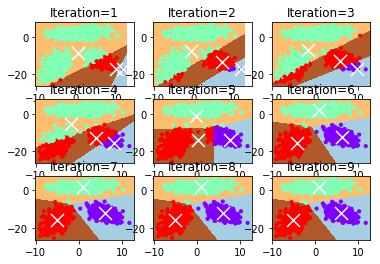

In [15]:
h=0.05 
grid_size=0.05
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
init=np.array([[-20,-5],[-19,-6],[-21,-4]])
plt.figure()

for k in range (1,10):
    print("Iteration {}".format(k))
    kmeans_model = KMeans(n_clusters=3,init=init,n_init=1, max_iter=k)  
    kmeans_model.fit(X)

    print(kmeans_model.cluster_centers_)
    Z = kmeans_model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.subplot(3,3,k) 
    plt.imshow(Z, interpolation='nearest',extent=(xx.min(), xx.max(), yy.min(), yy.max()),cmap=plt.cm.Paired,aspect='auto', origin='lower')
    plt.scatter(X[:,0],X[:,1], c=kmeans_model.labels_, cmap='rainbow',s=10)
    centroids = kmeans_model.cluster_centers_
    plt.scatter(centroids[:, 0], centroids[:, 1],
            marker='x', s=169, linewidths=3,
            color='w', zorder=10)
    plt.title('Iteration='+str(k))
plt.show()

#### As You can see on Passing Each Interation over predicted Result sis getting Better and better